<a href="https://colab.research.google.com/github/segadamyan/DataVisualization/blob/main/src/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix

df = pd.read_csv("car_sales.csv", parse_dates=["Sale Date"])

df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Sale Month'] = df['Sale Date'].dt.to_period('M').dt.to_timestamp()

In [2]:
df.columns

Index(['Sale Date', 'Brand', 'Model', 'Year', 'Price (USD)', 'Discount (USD)',
       'Tax (USD)', 'Seller Type', 'Mileage (km)', 'Fuel Type',
       'Engine Size (L)', 'Transmission', 'Drivetrain', 'Color',
       'Safety Rating', 'Financing Option', 'Buyer Age Group',
       'Previous Ownership', 'Purchase Reason', 'Location', 'Sale Month'],
      dtype='object')

# Time Series Analysis: Sales per Month

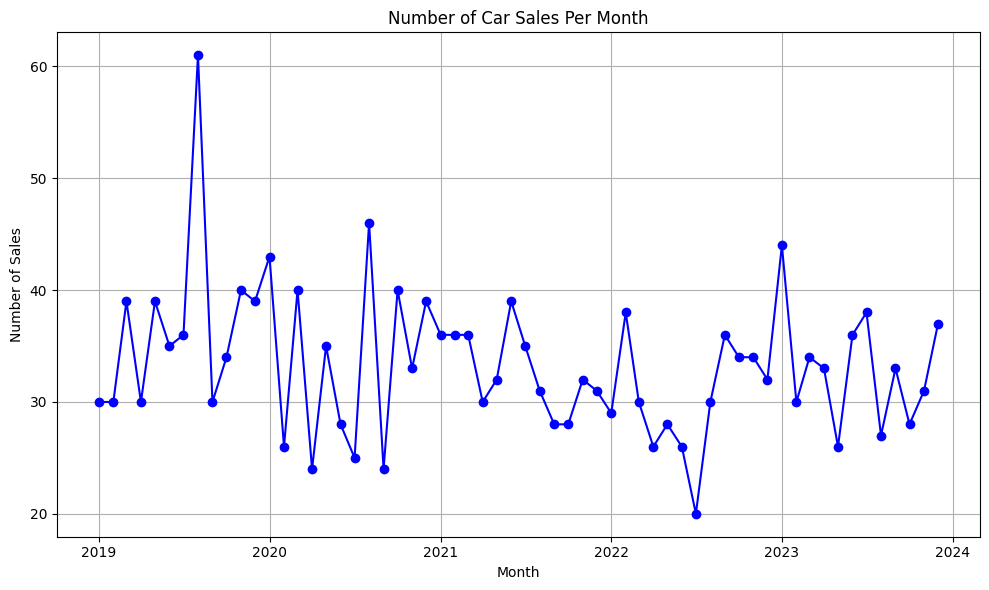

In [3]:
sales_per_month = df.groupby('Sale Month').size()
plt.figure(figsize=(10,6))
plt.plot(sales_per_month.index, sales_per_month.values, marker='o', linestyle='-', color='blue')
plt.title("Number of Car Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


# Distribution of Car Prices: Histogram and KDE

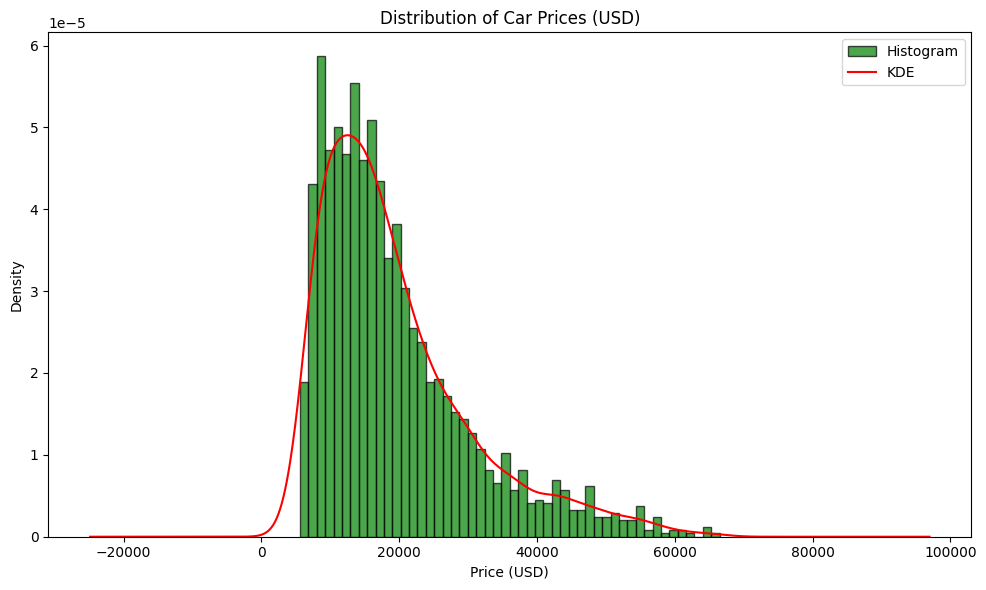

In [4]:
plt.figure(figsize=(10,6))
plt.hist(df['Price (USD)'], bins=50, alpha=0.7, color='green', edgecolor='black', density=True, label="Histogram")
df['Price (USD)'].plot(kind='kde', color='red', label="KDE")
plt.title("Distribution of Car Prices (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


# Scatter Plot: Mileage vs. Price by Fuel Type

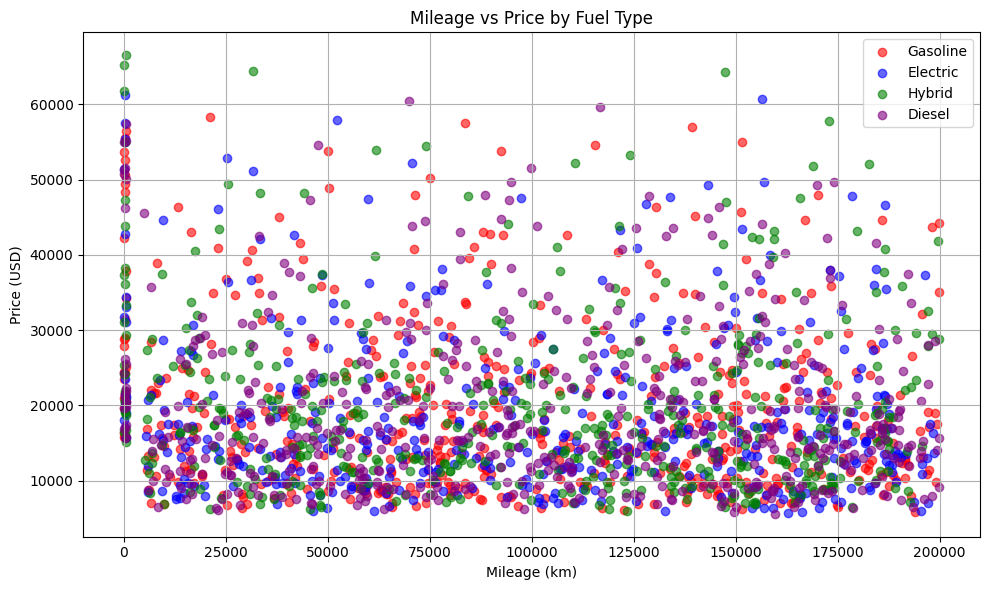

In [5]:
plt.figure(figsize=(10,6))
fuel_types = df['Fuel Type'].unique()
colors = ['red', 'blue', 'green', 'purple']
for fuel, color in zip(fuel_types, colors):
    subset = df[df['Fuel Type'] == fuel]
    plt.scatter(subset['Mileage (km)'], subset['Price (USD)'], label=fuel, alpha=0.6, color=color)
plt.title("Mileage vs Price by Fuel Type")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot: Price Distribution by Brand

<Figure size 1200x600 with 0 Axes>

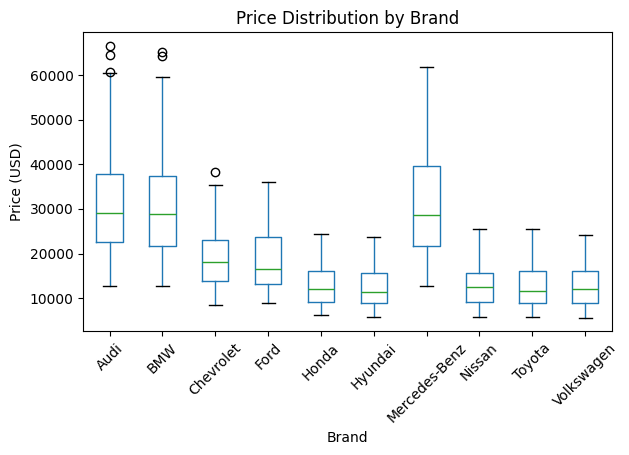

In [6]:
plt.figure(figsize=(12,6))
df.boxplot(column="Price (USD)", by="Brand", grid=False)
plt.title("Price Distribution by Brand")
plt.suptitle('')  # Removes the automatic suptitle to clean up the layout
plt.xlabel("Brand")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Correlation Heatmap among Numerical Features

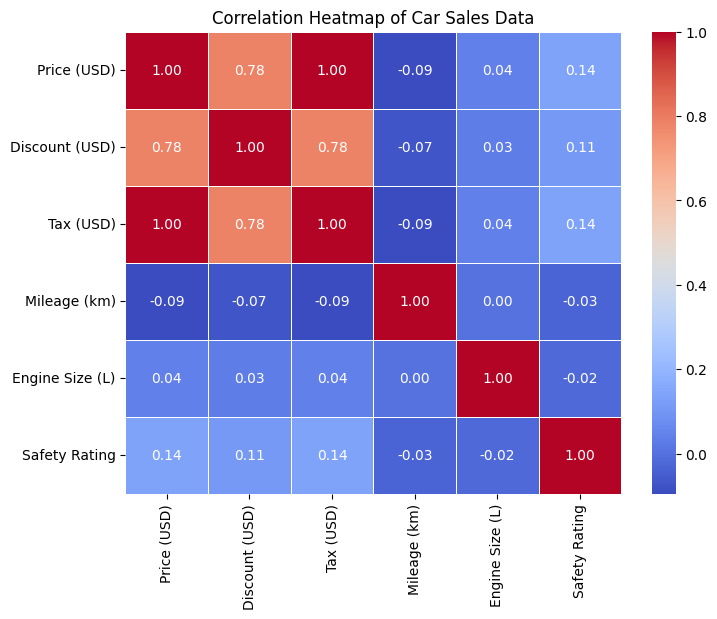

In [7]:
import seaborn as sns

num_cols = ["Price (USD)", "Discount (USD)", "Tax (USD)", "Mileage (km)", "Engine Size (L)", "Safety Rating"]
corr = df[num_cols].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Car Sales Data")
plt.show()

# Grouped Bar Chart: Average Price by Brand and Seller Type

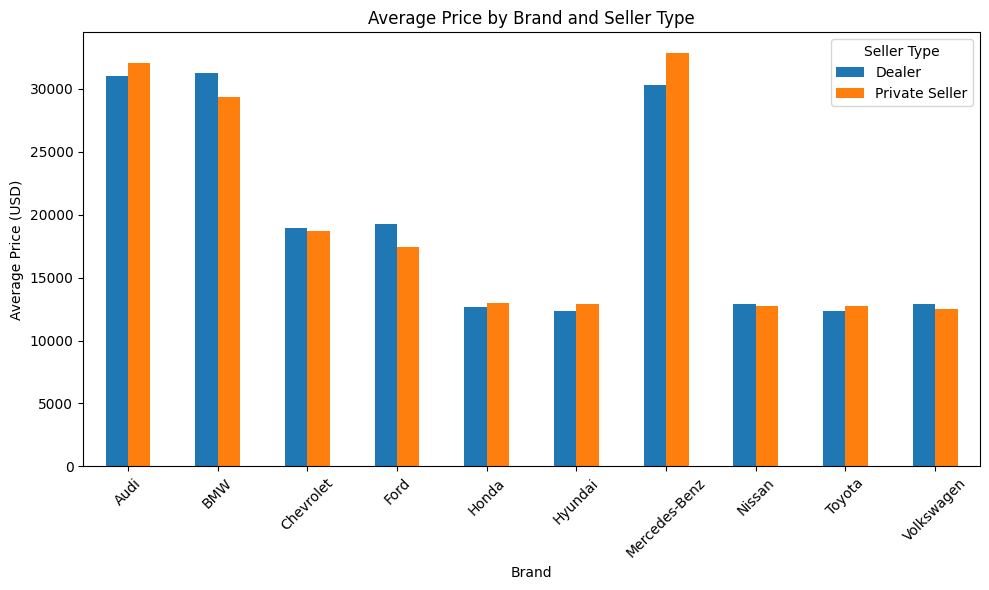

In [8]:
pivot = df.pivot_table(values="Price (USD)", index="Brand", columns="Seller Type", aggfunc="mean")
pivot.plot(kind="bar", figsize=(10,6))
plt.title("Average Price by Brand and Seller Type")
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Advanced Multi-plot: Scatter Matrix of Selected Features

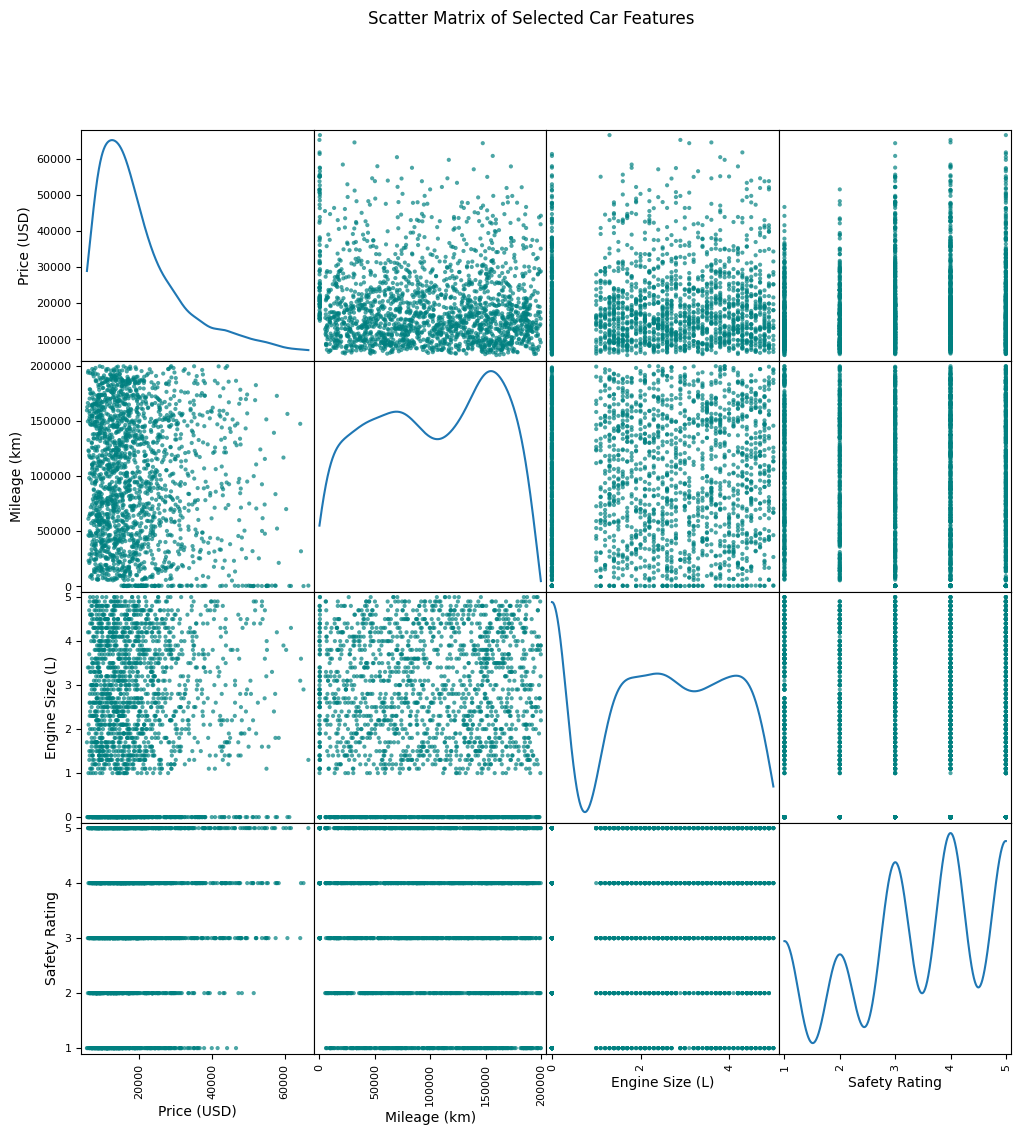

In [9]:
selected_cols = ["Price (USD)", "Mileage (km)", "Engine Size (L)", "Safety Rating"]
scatter_matrix(df[selected_cols], figsize=(12, 12), diagonal='kde', alpha=0.7, color='teal')
plt.suptitle("Scatter Matrix of Selected Car Features")
plt.show()